In [1]:
import torch
from torch import nn,optim
from mltools import ld,draw,models

In [3]:
vocab,train_iter,val_iter,test_iter=ld.chn_senti_corp('./data/ChnSentiCorp_htl_all.csv') # 加载词表，数据集
rnn_layer=nn.LSTM(len(vocab), hidden_size=512, batch_first=True, bidirectional=True) # 定义循环网络LSTM
model=models.RNNModel(rnn_layer, vocab_size=len(vocab), step_size=200, output_size=2) # 定义训练模型
device=torch.device('cuda')

Epoch 0, Training loss 0.6793211102485657, Validation loss 0.679155707359314
Epoch 1, Training loss 0.668362021446228, Validation loss 0.6702245473861694
Epoch 2, Training loss 0.6714160442352295, Validation loss 0.650896430015564
Epoch 3, Training loss 0.6545710563659668, Validation loss 0.6371929049491882
Epoch 4, Training loss 0.5574050545692444, Validation loss 0.6417646408081055
Epoch 5, Training loss 0.6146597266197205, Validation loss 0.6173767447471619
Epoch 6, Training loss 0.6337831616401672, Validation loss 0.6303341388702393
Epoch 7, Training loss 0.6302778720855713, Validation loss 0.6411864757537842
Epoch 8, Training loss 0.6669032573699951, Validation loss 0.5406678318977356
Epoch 9, Training loss 0.6373036503791809, Validation loss 0.561531662940979


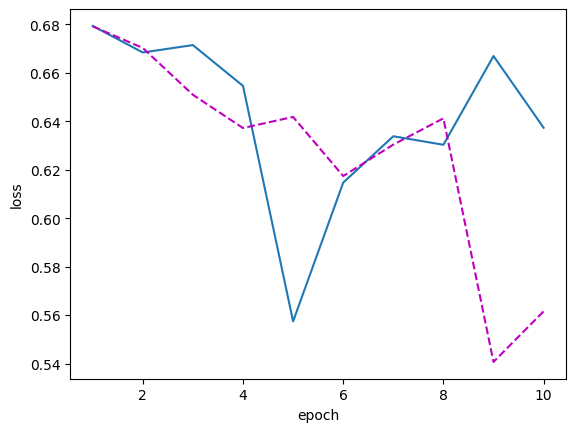

In [4]:
# 训练
def train(model, train_iter, val_iter, vocab, *, num_epochs, learning_rate, device):
    model.to(device) # 将网络复制到device上
    loss = nn.CrossEntropyLoss() # 定义损失函数
    optimizer = torch.optim.SGD(model.parameters(), learning_rate) # 定义优化器
    train_losses,val_losses=[],[] # 记录训练集和验证集的损失值
    for epoch in range(num_epochs):
        # 计算训练集
        for x, y in train_iter:
            # 运算
            x, y = x.to(device), y.to(device)
            y_train, _ = model(x)
            train_loss = loss(y_train, y)
            # 梯度更新
            optimizer.zero_grad()
            train_loss.backward()
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=1, norm_type=2)
            optimizer.step()
        # 计算验证集
        with torch.no_grad():
            for x, y in val_iter:
                # 运算
                x, y = x.to(device), y.to(device)
                y_val, _ = model(x)
                val_loss = loss(y_val, y)
        # 添加损失值
        train_losses.append(train_loss.detach().cpu())
        val_losses.append(val_loss.detach().cpu())        
        print(f"Epoch {epoch}, Training loss {train_loss}, Validation loss {val_loss}") # 打印损失值
    draw.plot(y=[train_losses,val_losses],xlabel='epoch',ylabel='loss') # 画出损失图
train(model,train_iter,val_iter,vocab,num_epochs=10,learning_rate=1e-4,device=device)

In [5]:
# 测试模型
def test(model,test_iter,device):
    model.to(device) # 将网络复制到device上
    test_num,real_num=0,0 # 定义测试数量和预测真实数量
    # 测试
    for x,y in test_iter:
        x,y=x.to(device),y.to(device)
        y_test, _ = model(x)
        y_test=y_test.argmax(dim=1)
        pred=y==y_test
        test_num+=len(pred)
        real_num+=pred.sum()
    print(f'Accuracy rate {real_num/test_num}') # 计算测试准确率并输出
test(model,test_iter,device)

Accuracy rate 0.6972556114196777


In [6]:
# 预测模型
def predict(model, test_iter, device):
    model.to(device) # 将网络复制到device上
    # 从测试中取一个批量
    x, y = next(iter(test_iter))
    x, y = x[:10].to(device), y[:10].to(device)
    values = [''.join(item) for item in vocab[x.tolist()]]
    # 预测
    y_pred, _ = model(x)
    y_pred = y_pred.argmax(dim=1)
    for pred, true, value in zip(y_pred, y, values):
        print(f'预测值 {pred}, 真实值 {true}, 数据 {value}')
predict(model, test_iter, device)

tensor([[-0.3448,  0.3413],
        [-0.2762,  0.2726],
        [-0.3135,  0.3170],
        [-0.3460,  0.3413],
        [-0.3151,  0.3196],
        [-0.3375,  0.3356],
        [-0.2698,  0.2676],
        [-0.3301,  0.3284],
        [-0.3362,  0.3380],
        [-0.2553,  0.2498]], device='cuda:0', grad_fn=<AddmmBackward0>)
预测值 1, 真实值 1, 数据 设施有点陈旧,位置不错,不过总体还不错.<pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad